<a href="https://colab.research.google.com/github/saffarizadeh/Nanyang/blob/master/Introduction_to_Business_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nanyang Technological University

#Nanyang Business School


---


# Introduction to Business Analytics



## Supervised Machine Learning (Classification)

First we need to import the needed libraries.

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Then we can load the Boston house prices dataset.

In [29]:
# Boston house prices dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target > np.mean(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,True
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,True
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,True
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,True


For this exercise we will only use RM, TAX, and price.
* RM: average number of rooms per dwelling
* LSTAT: percentage of lower status (class) of the population
* price: whether the price of this unit is more than average or not.

In [0]:
X = df[['RM', 'LSTAT']]
y = df['price']

### SVM Classification

Let's divide our data into a training set and a test set.

We will use 80% of the data to train the model and keep the remaining 20% to test the model.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Now we can train our model.

As you can see we only need two lines of code to train the model!

In [42]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Now we can test the accuracy of the model, using the test dataset.

In [43]:
accuracy_score(y_test, clf.predict(X_test))

0.803921568627451

### Plotting the Results

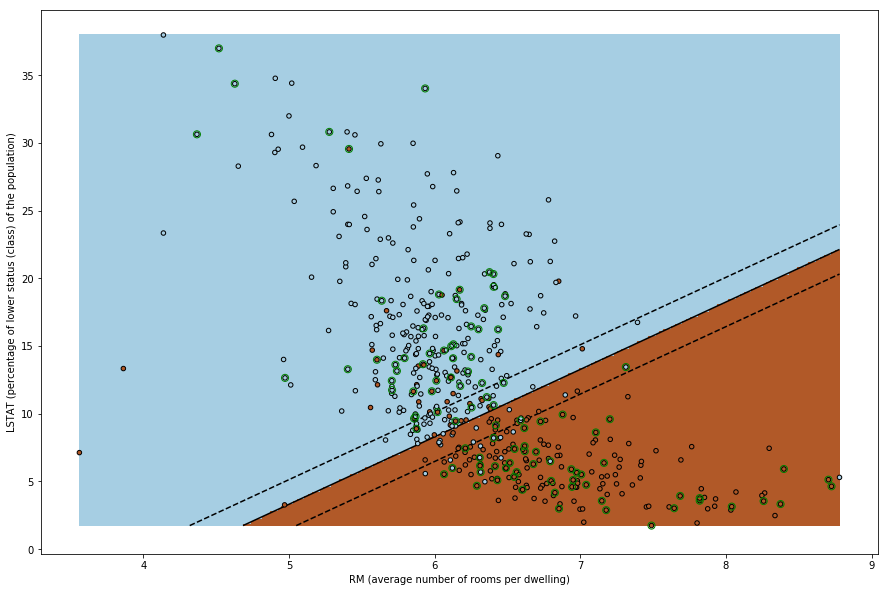

In [77]:
x_min = X.iloc[:, 0].min()
x_max = X.iloc[:, 0].max()
y_min = X.iloc[:, 1].min()
y_max = X.iloc[:, 1].max()
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.figure(figsize=(15, 10))
plt.clf()
# Plot all data (train + test)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, zorder=10, edgecolor='k', s=20, cmap=plt.cm.Paired)
# Circle out the test data
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], zorder=10, edgecolor='g', s=50, facecolors='none')
plt.axis('tight')
# Plot class regions
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
# Plot boundry margins
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.xlabel("RM (average number of rooms per dwelling)")
plt.ylabel("LSTAT (percentage of lower status (class) of the population)")
plt.show()

## Unsupervised Machine Learning (Clustering)

First we need to import the needed libraries.

In [0]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np
from sklearn.cluster import AgglomerativeClustering

Next, we import a customer dataset.

In [63]:
customer_data = pd.read_csv('https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')
customer_data = customer_data.iloc[:, 3:5]
customer_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Now we can use an unsupervised machine learning method to cluster our customers into different groups.

Here we use hiearchical clustering.

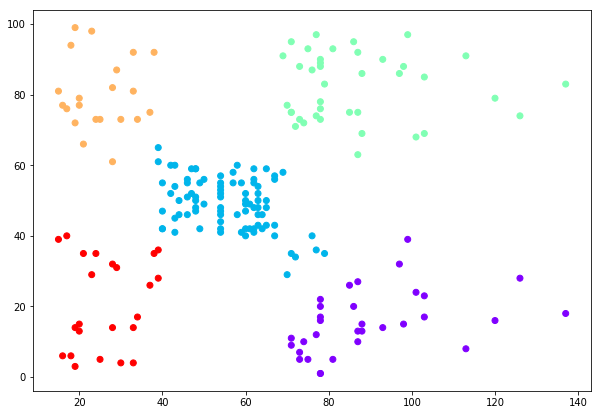

In [78]:

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(customer_data.values)
plt.figure(figsize=(10, 7))  
plt.scatter(customer_data.values[:,0], customer_data.values[:,1], c=cluster.labels_, cmap='rainbow')